In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the dataset into  Pandas dataframe

In [6]:
CC_details=pd.read_csv("D:\\creditcard1.csv")

In [7]:
#Checking first five rows of the dataset.
CC_details.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
CC_details.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
CC_details.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V27.1,V16.1,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,0.133558,-0.470401,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,-0.008983,0.463917,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.055353,-2.890083,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.062723,-1.059647,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,NaN,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.219422,-0.451449,0.215153,69.99,0


# Checking the information of data

# 

In [11]:
CC_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

This tells the number of enteries and number of columns and also it tells the datatypes of each of the columns,
and it tells how many values are present in the dataset.

# 

# Missing Values
Checking the number of missing values in each column

In [10]:
CC_details.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
CC_details.isnull().sum().sum()

0

There are no null values.

# Distribution
Checking the distribution of legit transactions and fraudulent transaction

In [15]:
CC_details["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The Dataset is highly unbalanced

0-->>Legit Transaction

1-->>Fraudulent Transaction

# 

# Seperating the Data for analysis.

In [16]:
#creating two variables for normal transaction and fraud transaction
legit=CC_details[CC_details.Class==0]
fraud=CC_details[CC_details.Class==1]

# 

# Checking the shape of dataset

In [17]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


# Statistical Measures of Data

In [18]:
#this will tell the legit transaction amount wrt amount
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
#this will tell the fraud transaction amount wrt amount
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
#compare the mean values for both transactions
CC_details.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under-Sampling

Under sampling is basically done when the number of instances in the minority class is much smaller than the
instances in majority class

Build a sample data set containing similar distribution of legit and fraud transaction
Number of fraudulent transaction -- 492

In [21]:
#this will take 492 random values stored in legit variable
legit_sample=legit.sample(n=492)

Concatenating two DataFrames

In [22]:
new_dataset=pd.concat([legit_sample,fraud], axis=0)

In [23]:
#Checking first five rows of our new dataset, which will display all the legit transactions
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
184882,126430.0,-1.254516,-0.805022,-0.126416,-3.055988,1.659383,-1.633425,0.516551,-1.204969,1.219939,...,0.576427,-0.377386,-0.171633,-0.387247,-0.521578,-0.730449,0.238911,-0.109904,73.77,0
126621,78041.0,-1.412416,-0.553457,2.568077,-1.552386,0.071558,-1.558617,-0.391729,0.149166,1.270027,...,0.130263,0.214664,-0.139856,0.708169,0.489028,-0.793063,0.073653,0.097515,1.00,0
184064,126078.0,-0.935978,1.564623,-0.668220,-0.766390,0.712045,-0.429615,0.910558,-0.509221,0.726955,...,-0.040030,-0.469767,0.140398,-1.022277,-1.356188,0.017694,-0.932242,0.296453,4.49,0
49603,44132.0,0.041351,-2.448057,-0.455488,0.406956,-1.569721,-0.870497,0.726708,-0.415071,-1.125757,...,-0.451541,-2.506081,-0.255824,0.332270,-0.314182,-0.093983,-0.160853,0.141167,698.68,0
202720,134459.0,-2.717029,-1.727337,2.188997,-0.161606,0.391701,-0.881137,-1.383404,0.856820,0.383126,...,0.491570,0.423414,-0.130891,1.201951,0.216280,0.667987,-0.085154,-0.317900,67.50,0


In [24]:
#Checking last five rows of our new dataset, which will display all the fraud transactions
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [25]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Now we have uniformly distrubuted data of legit and fraudulent transaction

In [26]:
new_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94511.040650,-0.024901,0.020449,0.045377,0.072654,-0.055052,-0.097141,-0.021905,-0.049712,-0.077362,...,0.014676,-0.047643,-0.019830,0.030251,0.005546,0.047858,0.012774,-0.015194,0.002166,83.992825
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# 

# Splitting the data 

In [27]:
#split data into features and targets,where features represents the column name and targets represents class
x=new_dataset.drop(columns='Class', axis=1)
y=new_dataset['Class']

In [40]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
184882  126430.0 -1.254516 -0.805022 -0.126416 -3.055988  1.659383 -1.633425   
126621   78041.0 -1.412416 -0.553457  2.568077 -1.552386  0.071558 -1.558617   
184064  126078.0 -0.935978  1.564623 -0.668220 -0.766390  0.712045 -0.429615   
49603    44132.0  0.041351 -2.448057 -0.455488  0.406956 -1.569721 -0.870497   
202720  134459.0 -2.717029 -1.727337  2.188997 -0.161606  0.391701 -0.881137   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [41]:
print(y)

184882    0
126621    0
184064    0
49603     0
202720    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# 

Now We will split our features and targets data into training data and split data

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


# 

# Model Training

Logistic Regression

In [81]:
#loading one instance of logistic regression in variable model
model = LogisticRegression()

In [82]:
#training the Logistic Regression Model with training data
model.fit(x_train, y_train)

LogisticRegression()

In [83]:
y_pred1=model.predict(x_test)

# 

# Model Evaluation

Accuracy score

In [84]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [85]:
print("Accuracy on Training Data: ",training_data_accuracy)

Accuracy on Training Data:  0.9466327827191868


In [86]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [87]:
print("Accuracy on Test Data: ",test_data_accuracy)

Accuracy on Test Data:  0.9289340101522843


In [88]:
#checking Correlation
corr=CC_details.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


# 

# Decision Tree Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [90]:
y_pred2=dt.predict(x_test)

In [91]:
accuracy_score(y_test,y_pred2)

0.934010152284264

In [92]:
precision_score(y_test,y_pred2)

0.9405940594059405

In [93]:
recall_score(y_test,y_pred2)

0.9313725490196079

In [94]:
f1_score(y_test,y_pred2)

0.935960591133005

# 

# RANDOM FOREST CLASSIFIER

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
     

RandomForestClassifier()

In [98]:
y_pred3=rf.predict(x_test)

In [99]:
accuracy_score(y_test,y_pred3)

0.9441624365482234

In [100]:
precision_score(y_test,y_pred3)

0.9789473684210527

In [101]:
recall_score(y_test,y_pred3)

0.9117647058823529

In [102]:
f1_score(y_test,y_pred3)

0.9441624365482234

In [103]:
final_data=pd.DataFrame({'Models':['LR','DT','RF'],'ACC':[accuracy_score(y_test,y_pred1)*100,
                                               accuracy_score(y_test,y_pred2)*100,
                                               accuracy_score(y_test,y_pred3)*100,]})
final_data

,Models,ACC
0,LR,92.893401
1,DT,93.401015
2,RF,94.416244


# Plotting bar graph

<AxesSubplot:xlabel='Models', ylabel='ACC'>

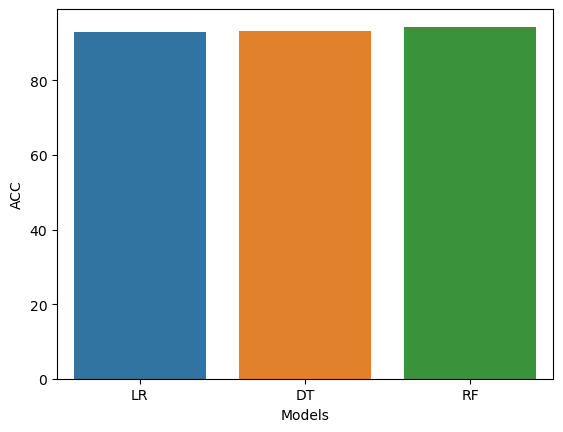

In [104]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])